## **CREDIT CARD FRAUD DETECTION**

In [36]:
import pandas as pd
import numpy as np


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Dense
from keras import regularizers
from keras.optimizers import Adam


In [13]:
import warnings
warnings.filterwarnings('ignore')

# 1. Data Pre-processing

In [14]:
data = pd.read_csv("/content/creditcard.csv")

In [15]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,...,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000
mean,2677.615501,-0.266159,0.285505,0.844231,0.104200,0.000709,0.194948,0.018324,-0.039006,0.396916,...,-0.043098,-0.161548,-0.036483,0.028960,0.089873,-0.040197,0.025234,0.006116,65.061811,0.000502
std,1765.025532,1.395405,1.208867,1.031448,1.442339,1.185900,1.365525,1.059870,1.304005,1.047749,...,0.883330,0.646380,0.373210,0.619810,0.407680,0.488284,0.364482,0.265131,192.490314,0.022407
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-12.968670,-23.632502,-3.336805,...,-11.468435,-8.454599,-7.996811,-2.512377,-2.322906,-1.338556,-7.976100,-2.909294,0.000000,0.000000
25%,1162.250000,-1.015749,-0.280054,0.295701,-0.839417,-0.609206,-0.677720,-0.492968,-0.189736,-0.264280,...,-0.260507,-0.594625,-0.187108,-0.350226,-0.152744,-0.399334,-0.049681,-0.017776,4.450000,0.000000
50%,2537.000000,-0.420703,0.346083,0.882882,0.161767,-0.083983,-0.142606,0.041761,0.037831,0.360826,...,-0.111701,-0.177197,-0.046772,0.094946,0.106290,-0.079583,0.015976,0.019417,15.620000,0.000000
75%,3781.750000,1.115402,0.941548,1.504158,1.071412,0.441406,0.605784,0.566306,0.343067,0.961662,...,0.059809,0.273148,0.088154,0.435670,0.355157,0.245560,0.155281,0.082701,56.660000,0.000000
max,6645.000000,1.685314,7.467017,4.101716,6.013346,10.658654,21.393069,34.303177,3.877662,9.272376,...,22.580675,4.393846,4.095021,3.200201,1.972515,3.463246,3.852046,4.860769,7712.430000,1.000000


In [16]:
data["Class"].value_counts()

0.0    5970
1.0       3
Name: Class, dtype: int64

In [17]:
original_rows = len(data)
data.shape

(5974, 31)

In [18]:
data.drop_duplicates(subset = None, keep = "first", inplace = True, ignore_index = True)

In [19]:
dedup_rows = len(data)
data.shape

(5938, 31)

In [20]:
print("Total duplicate rows removed : ", original_rows -dedup_rows)

Total duplicate rows removed :  36


In [21]:
data["Class"].value_counts()

0.0    5934
1.0       3
Name: Class, dtype: int64

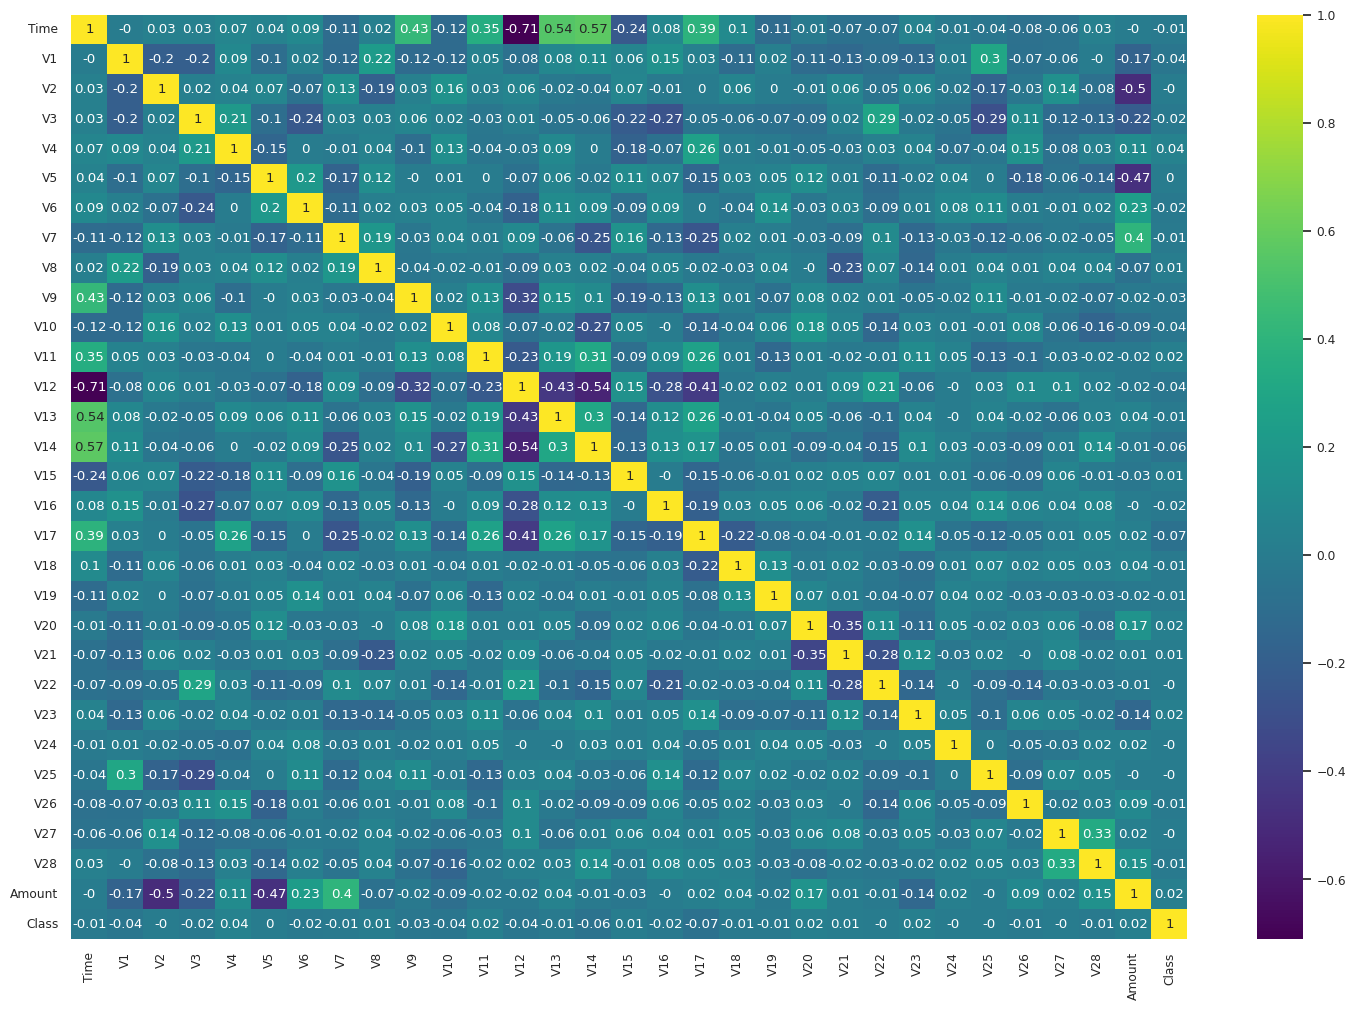

In [22]:
corr= round(data.corr(),2)
plt.figure(figsize=(18,12))
sns.set(font_scale=0.8)
sns.heatmap(corr, cmap = 'viridis', annot = True)
plt.show()

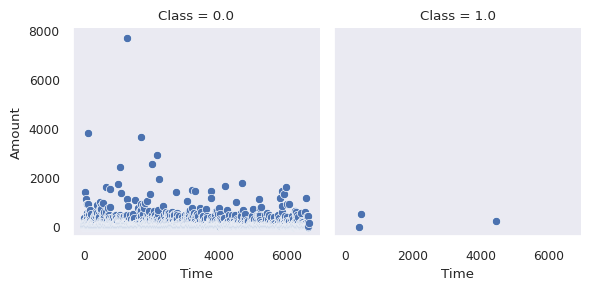

In [23]:
sns.set_style(style='dark')
sns.FacetGrid(data=data, col='Class').map(sns.scatterplot, 'Time', 'Amount', palette='muted')

In [24]:
new_data = data.drop(["Time","Amount"], axis = 1)

In [26]:
print(new_data["Class"].isnull().sum())
new_data = new_data.dropna(subset=["Class"])
X = new_data.drop("Class", axis=1)
y = new_data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


1


# 2. Isolation Trees



In [27]:
tree = [10, 25, 50, 100, 150, 200, 250, 500,1000]
for value in tree :
    iso_forest = IsolationForest(n_estimators=value, contamination='auto', random_state=42)
    iso_forest.fit(X_train)
    test_predictions = iso_forest.predict(X_test)
    test_binary_predictions = np.where(test_predictions == -1, 1, 0)
    print("No of trees used for prediction ",value, "\n", confusion_matrix(y_test, test_binary_predictions), "\n", classification_report(y_test, test_binary_predictions))

No of trees used for prediction  10 
 [[1127   60]
 [   0    1]] 
               precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      1187
         1.0       0.02      1.00      0.03         1

    accuracy                           0.95      1188
   macro avg       0.51      0.97      0.50      1188
weighted avg       1.00      0.95      0.97      1188

No of trees used for prediction  25 
 [[1149   38]
 [   0    1]] 
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      1187
         1.0       0.03      1.00      0.05         1

    accuracy                           0.97      1188
   macro avg       0.51      0.98      0.52      1188
weighted avg       1.00      0.97      0.98      1188

No of trees used for prediction  50 
 [[1144   43]
 [   0    1]] 
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      1187
         1.0       0.02      1.00   

# 2. Autoencoders


In [28]:
X_train_reset = X_train.reset_index()
y_train_reset = y_train.reset_index()
merged_df = X_train_reset.merge(y_train_reset, on='index', how='left')
X_train_normal = merged_df.copy()
X_train_normal = X_train_normal[X_train_normal["Class"] == 0]
X_train_normal = X_train_normal.drop(columns = ["Class", "index"])

In [29]:
X_train_normal.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,4747.000000,4747.000000,4747.000000,4747.000000,4747.000000,4747.000000,4747.000000,4747.000000,4747.000000,4747.000000,...,4747.000000,4747.000000,4747.000000,4747.000000,4747.000000,4747.000000,4747.000000,4747.000000,4747.000000,4747.000000
mean,-0.258470,0.293981,0.836901,0.096567,0.000577,0.185019,0.014621,-0.046427,0.391301,-0.102253,...,-0.024615,0.056176,-0.030448,-0.165689,-0.035941,0.027675,0.090766,-0.039745,0.029840,0.007487
std,1.390717,1.190782,1.023824,1.436739,1.118281,1.339027,0.959411,1.306156,1.043818,0.979778,...,0.797061,0.540661,0.917138,0.651246,0.380152,0.616968,0.407241,0.487205,0.337898,0.253585
min,-12.168192,-15.732974,-5.694973,-4.515824,-11.416881,-7.465603,-12.968670,-23.632502,-3.336805,-5.542187,...,-4.575941,-4.578147,-11.468435,-8.454599,-7.996811,-2.512377,-2.322906,-1.303960,-5.336289,-2.735623
25%,-0.996680,-0.275518,0.288120,-0.849532,-0.611723,-0.680310,-0.494380,-0.191806,-0.266497,-0.618265,...,-0.513414,-0.139345,-0.257731,-0.599220,-0.189172,-0.349023,-0.153565,-0.398333,-0.049048,-0.018757
50%,-0.416184,0.340985,0.873099,0.157925,-0.088854,-0.147628,0.043253,0.033739,0.361487,-0.174604,...,-0.011867,0.003267,-0.110683,-0.179170,-0.045511,0.091753,0.105763,-0.080210,0.015071,0.019238
75%,1.117060,0.937324,1.497097,1.061984,0.438939,0.584084,0.565926,0.330911,0.956941,0.282166,...,0.497280,0.179954,0.063248,0.270281,0.091510,0.430620,0.356358,0.243304,0.154238,0.082629
max,1.605329,7.467017,4.101716,5.072063,10.658654,7.885721,12.219249,3.877662,9.272376,11.936393,...,3.097749,7.744222,22.580675,4.393846,4.095021,3.200201,1.972515,3.463246,3.294538,4.860769


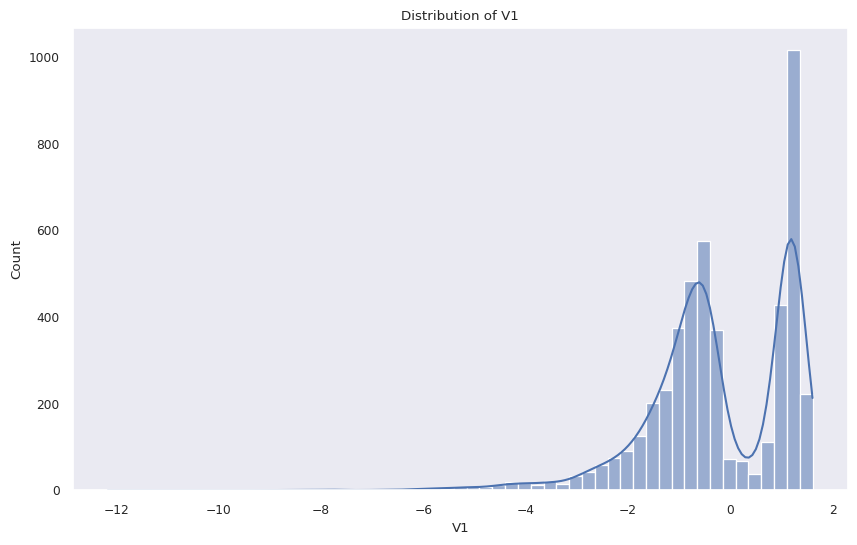

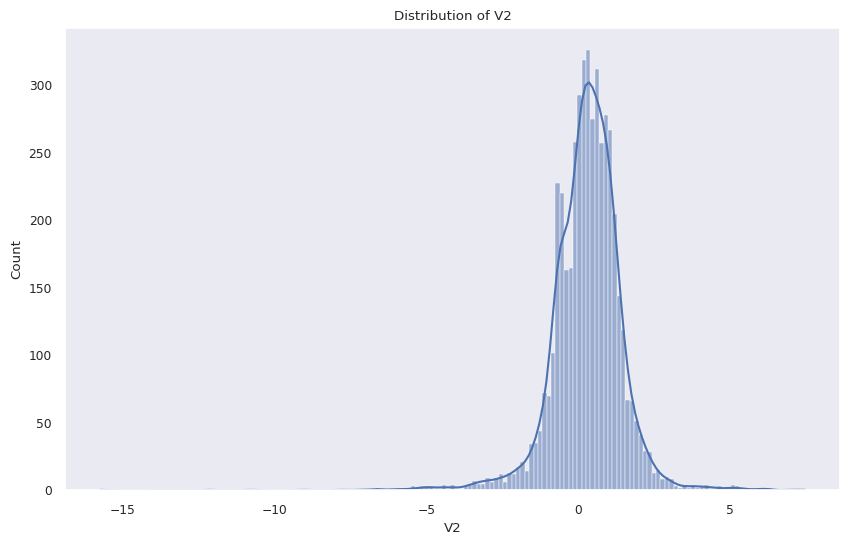

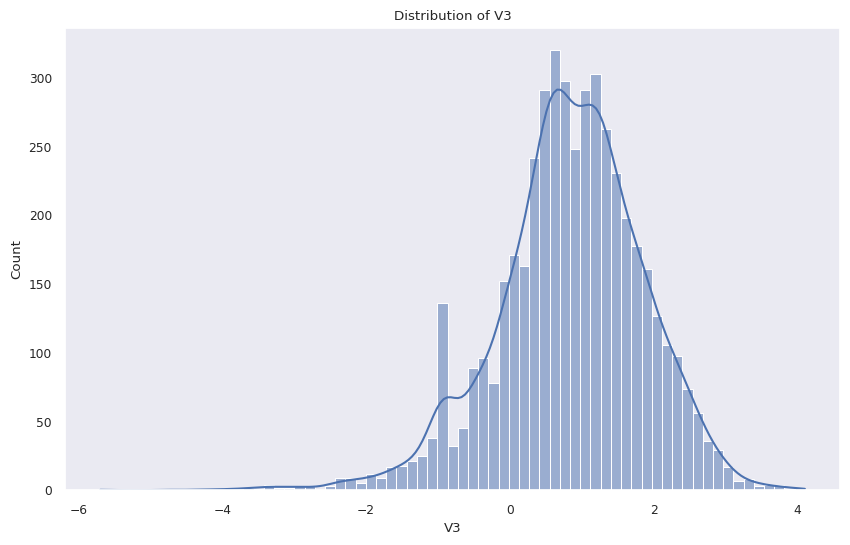

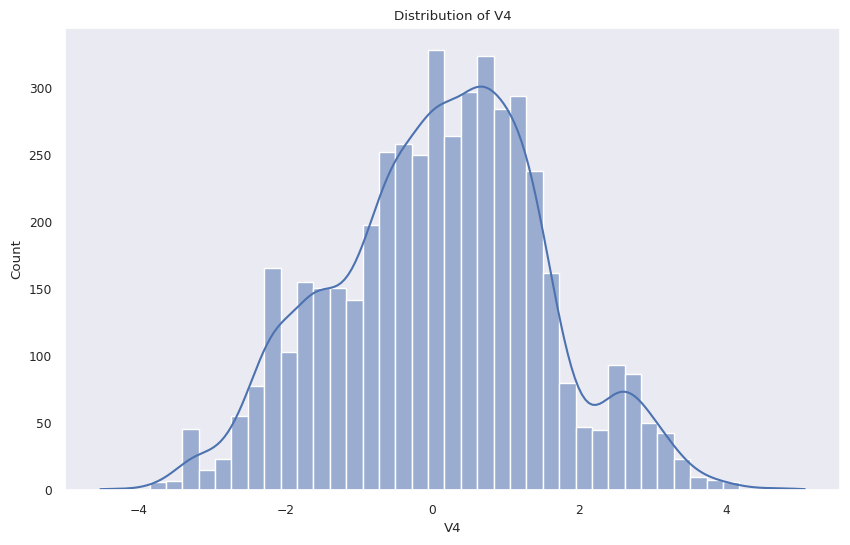

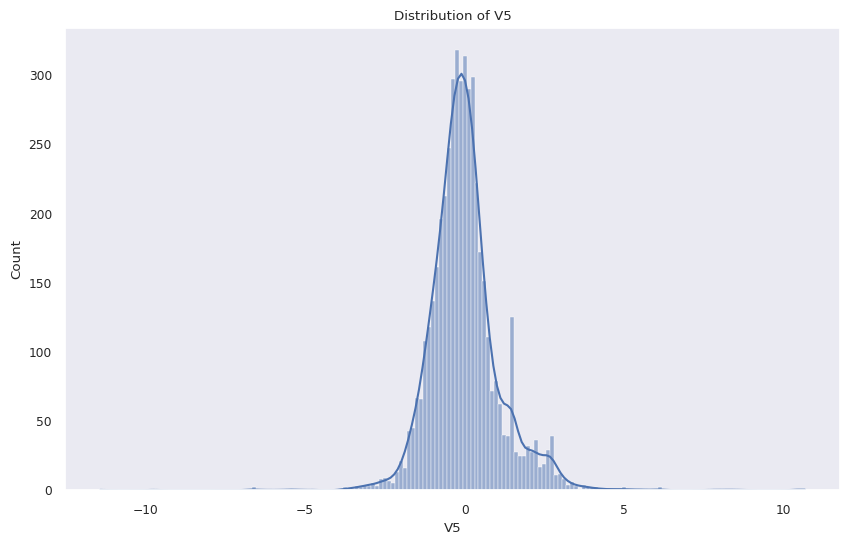

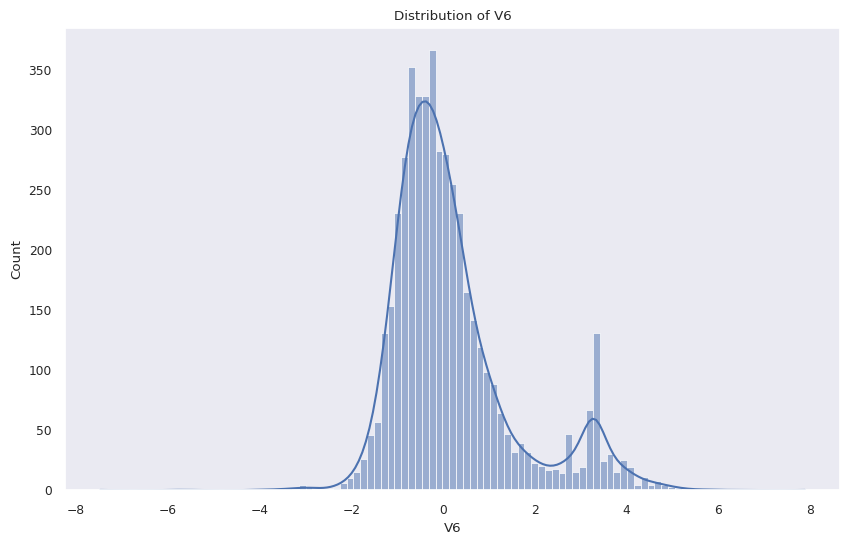

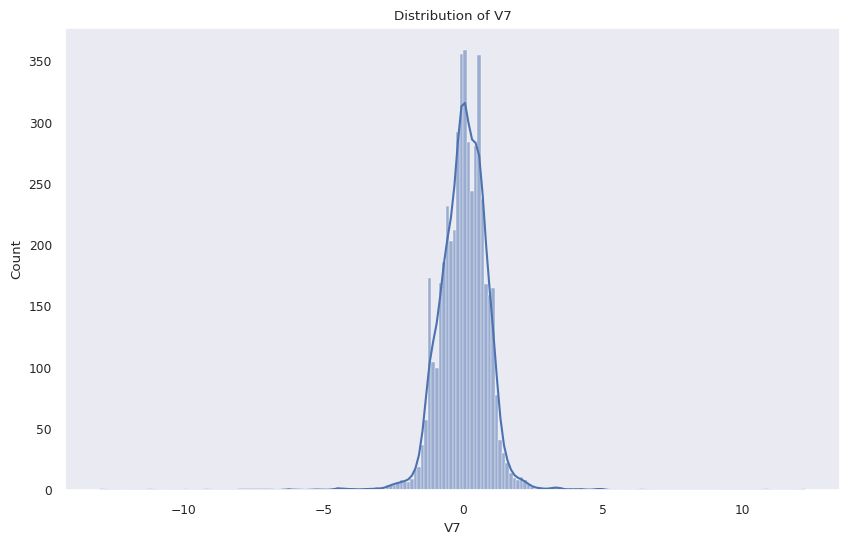

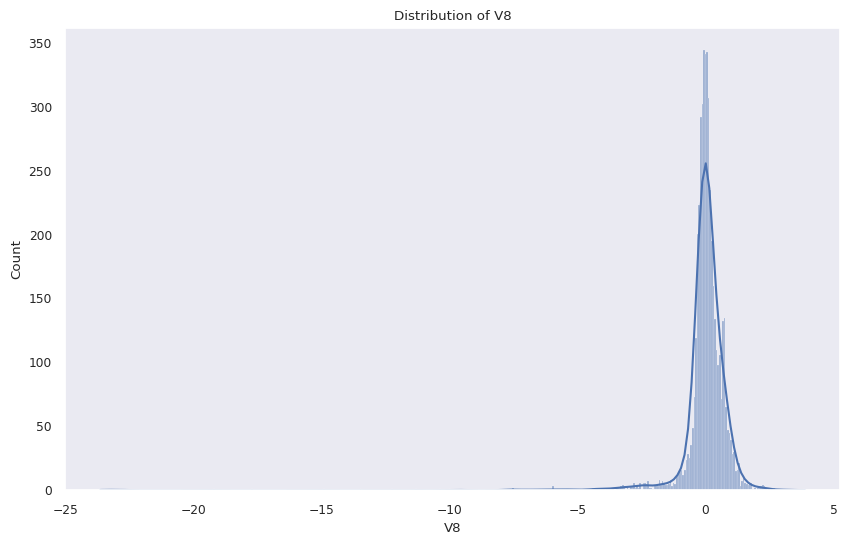

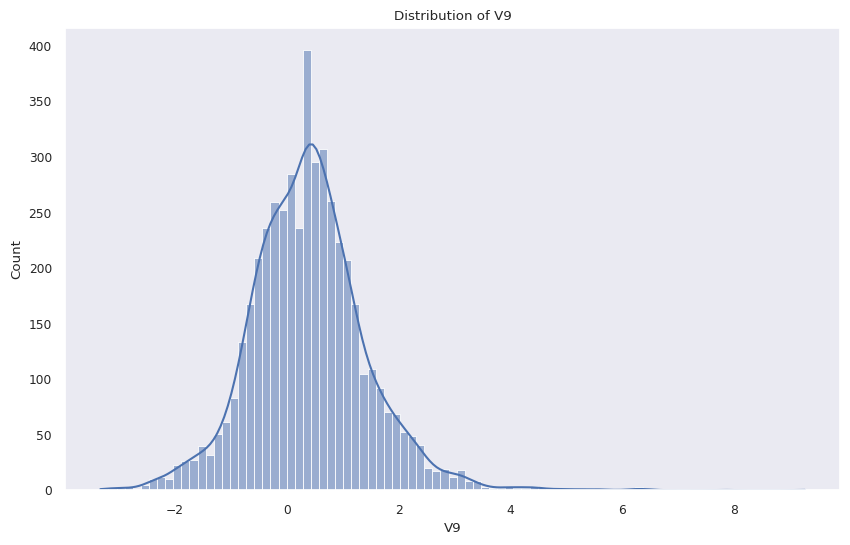

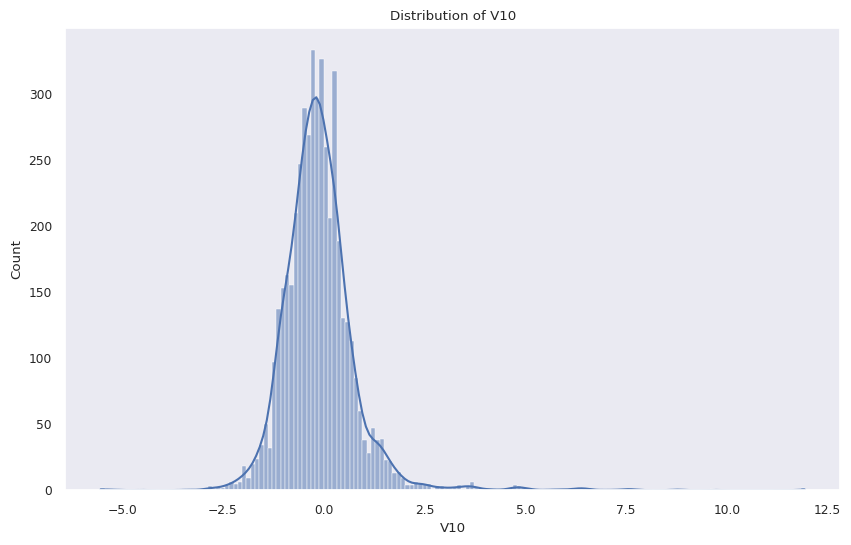

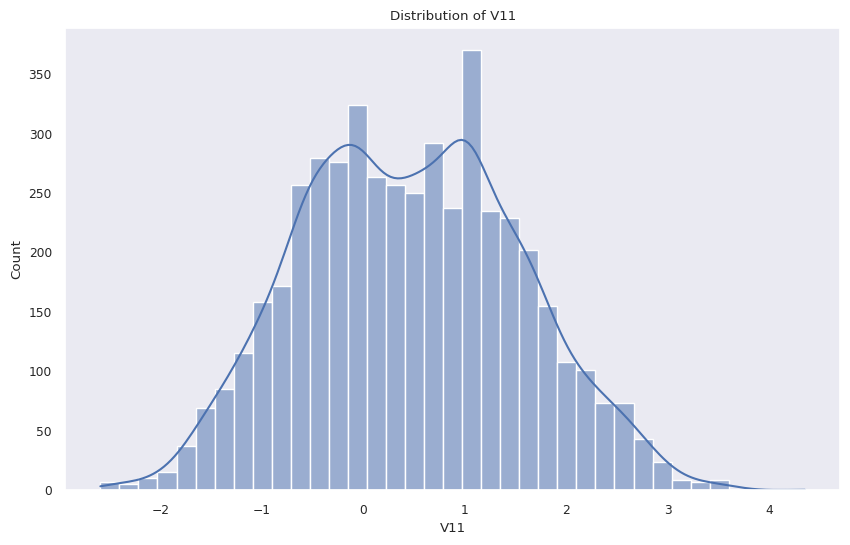

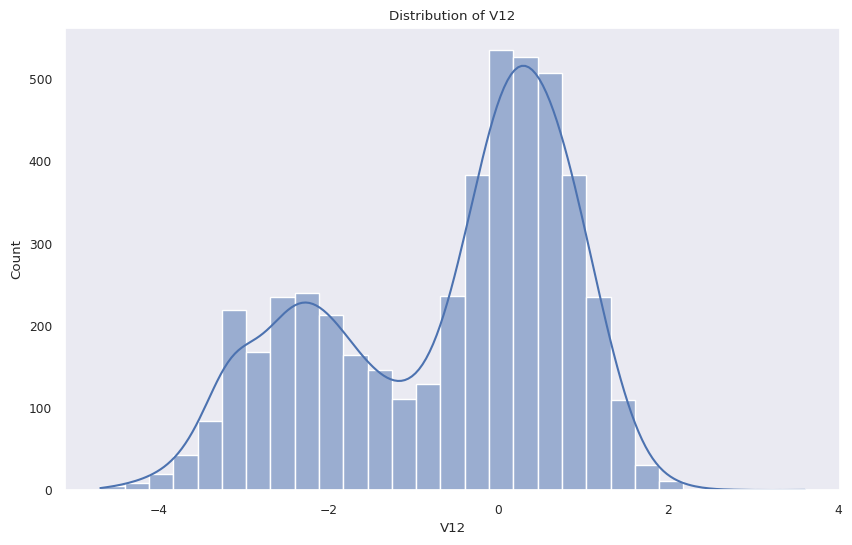

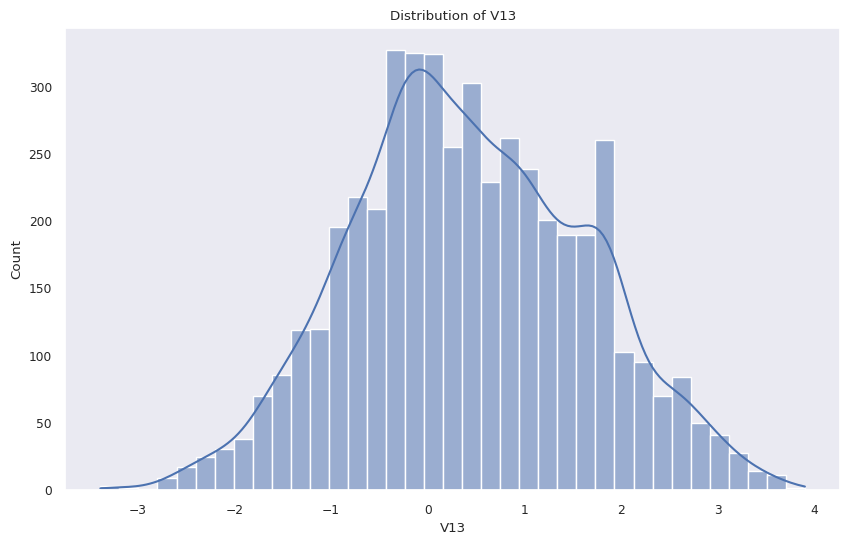

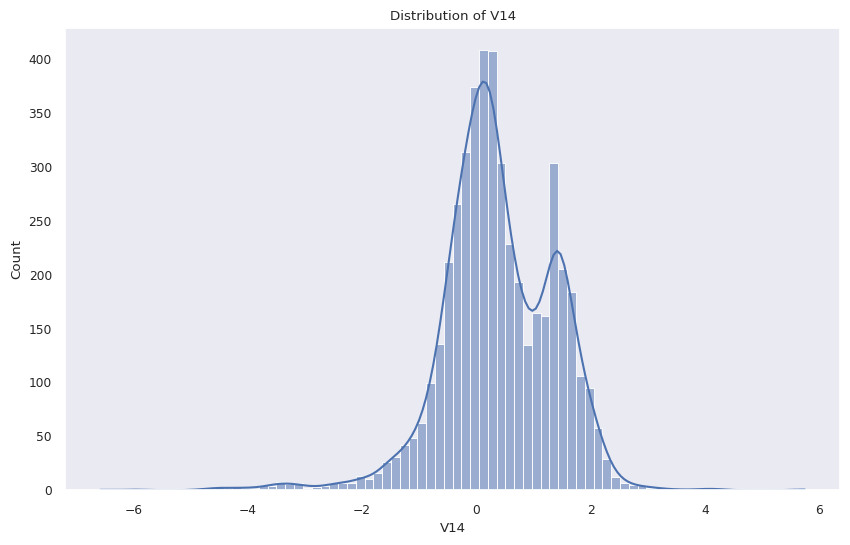

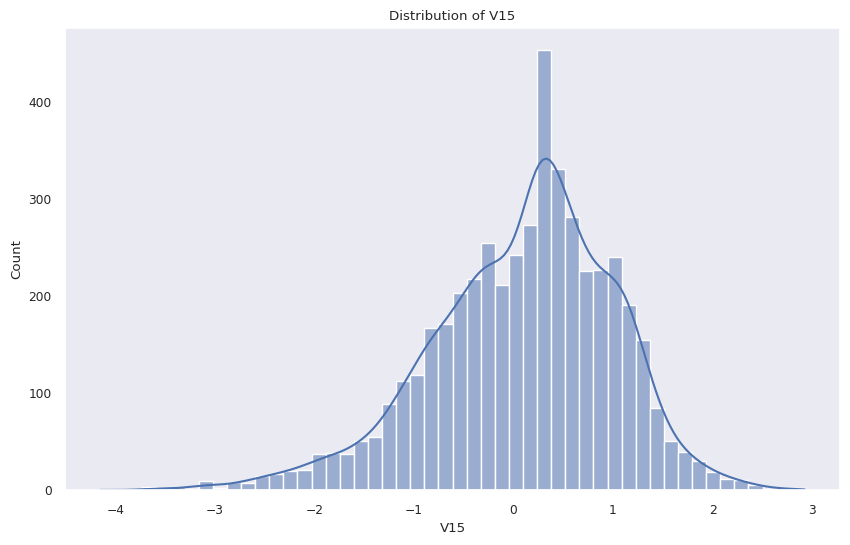

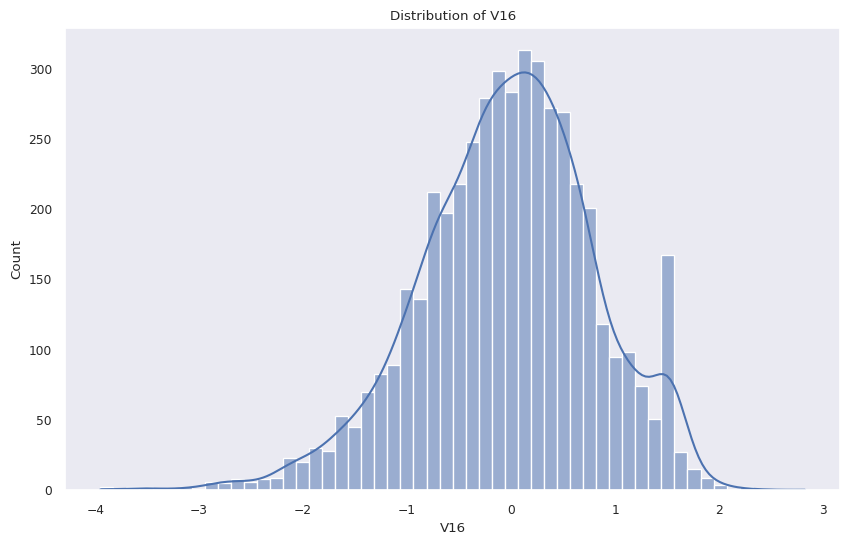

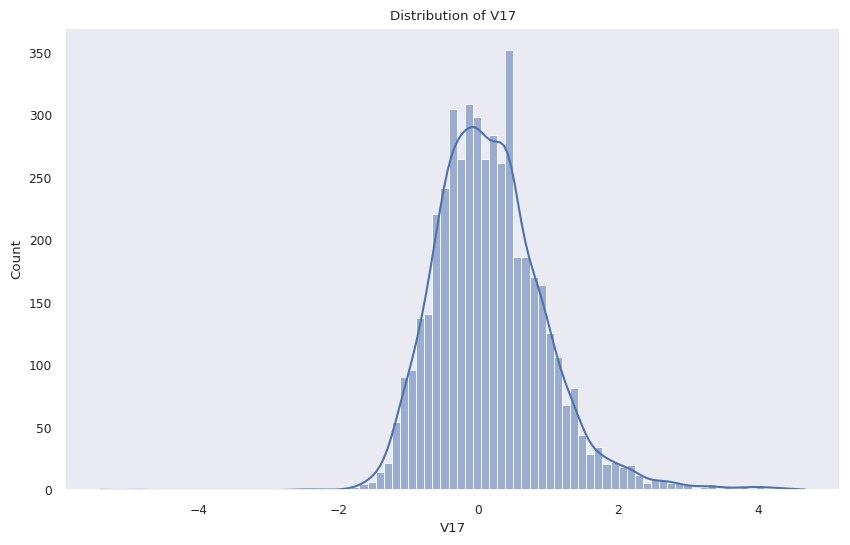

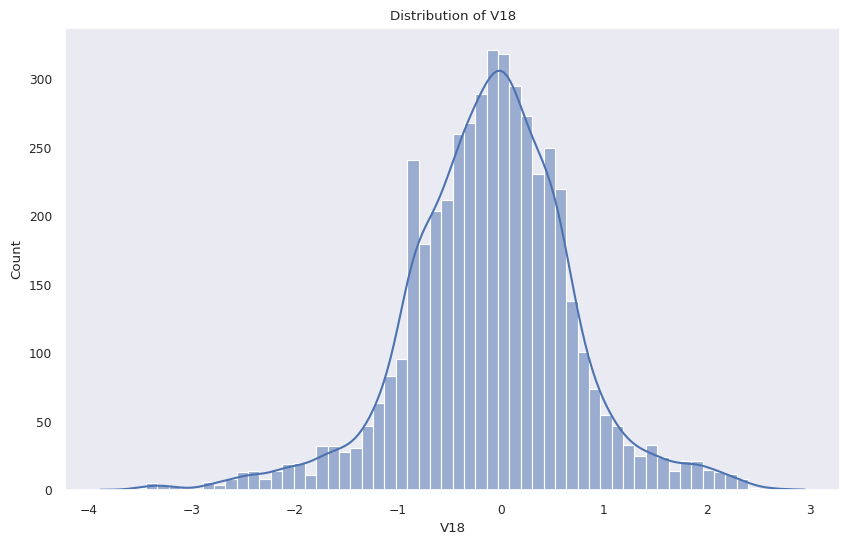

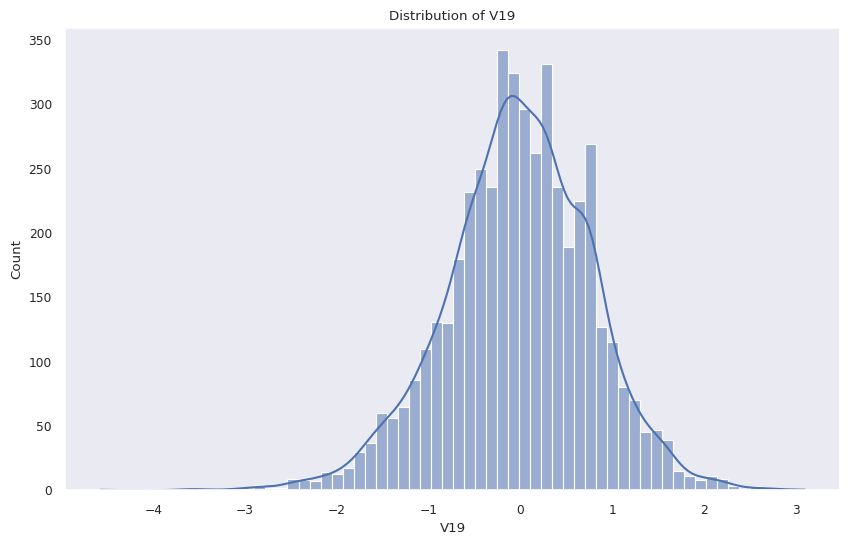

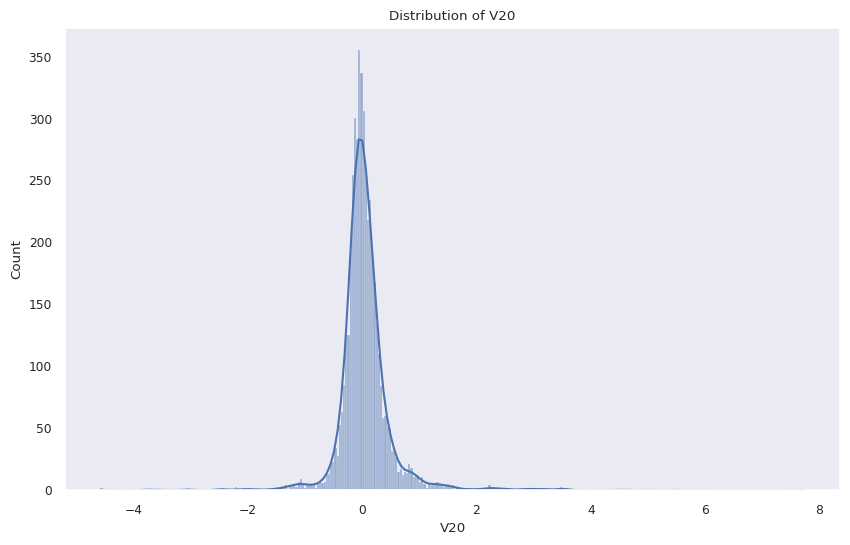

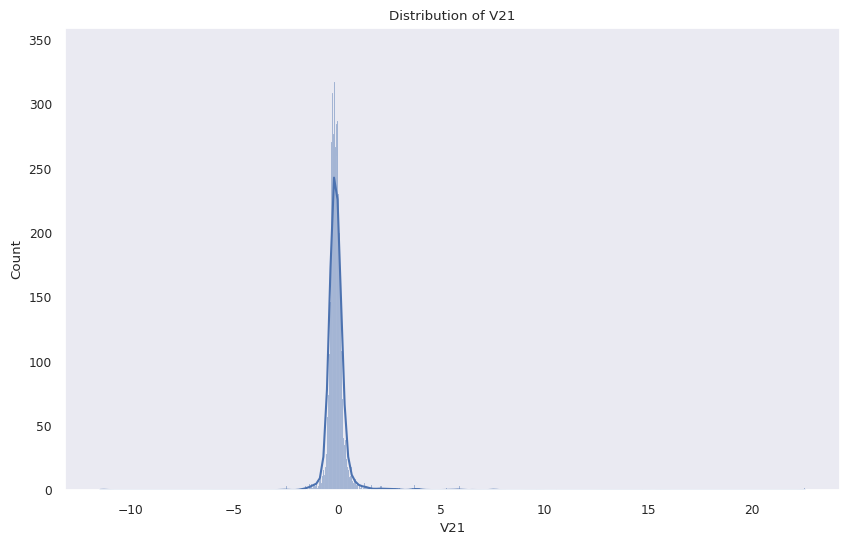

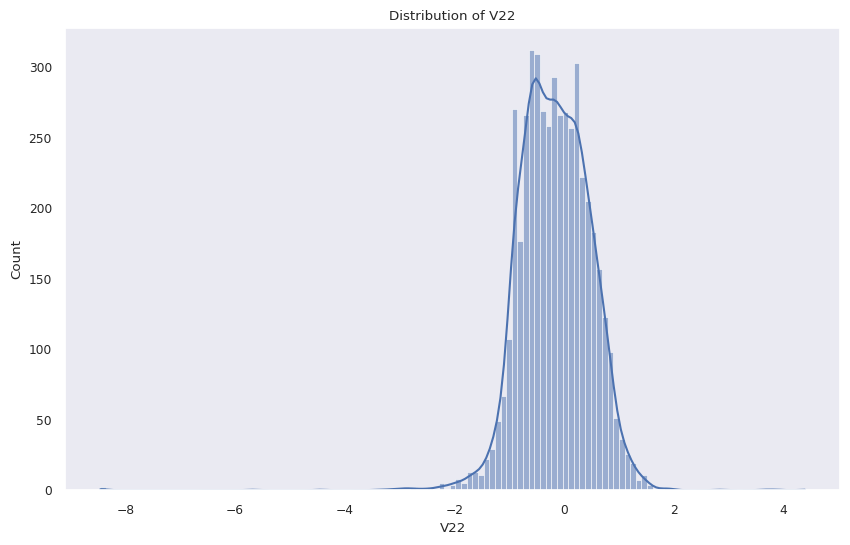

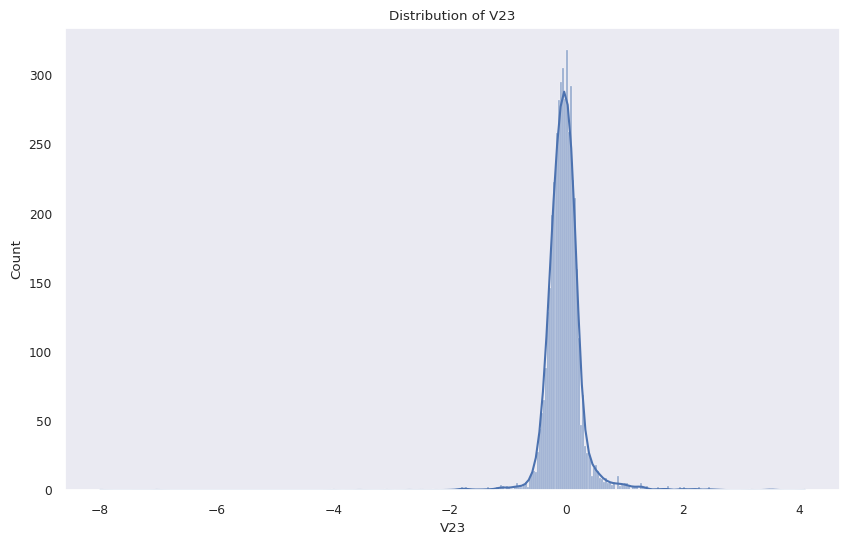

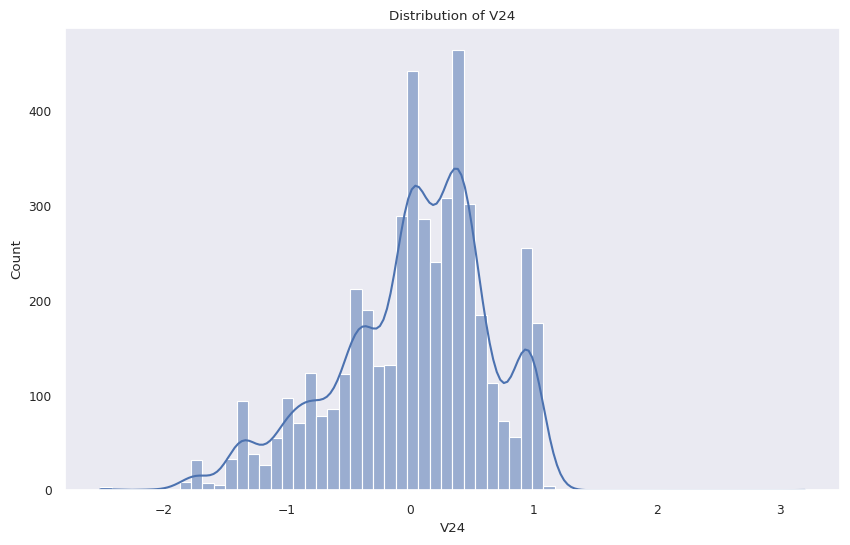

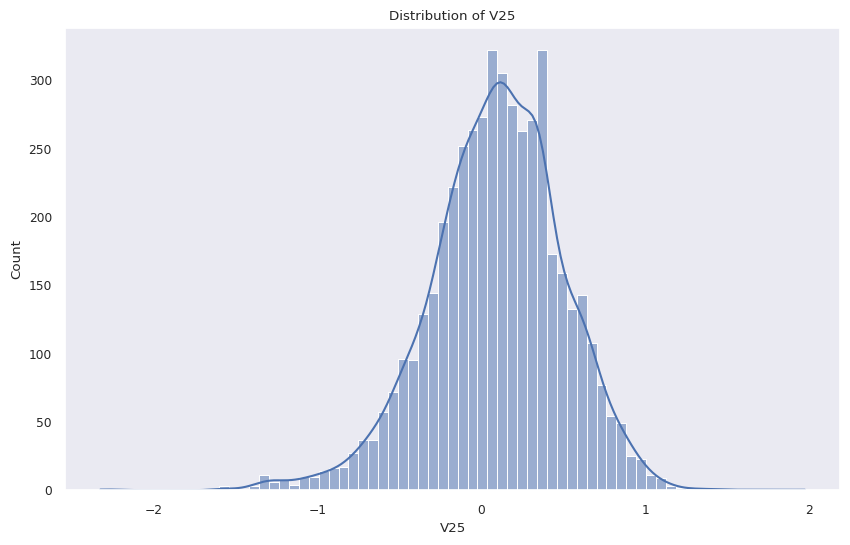

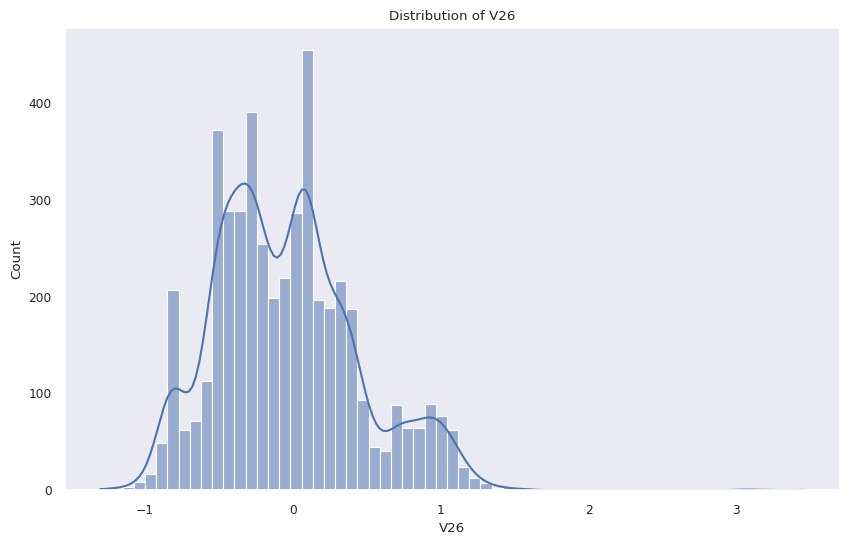

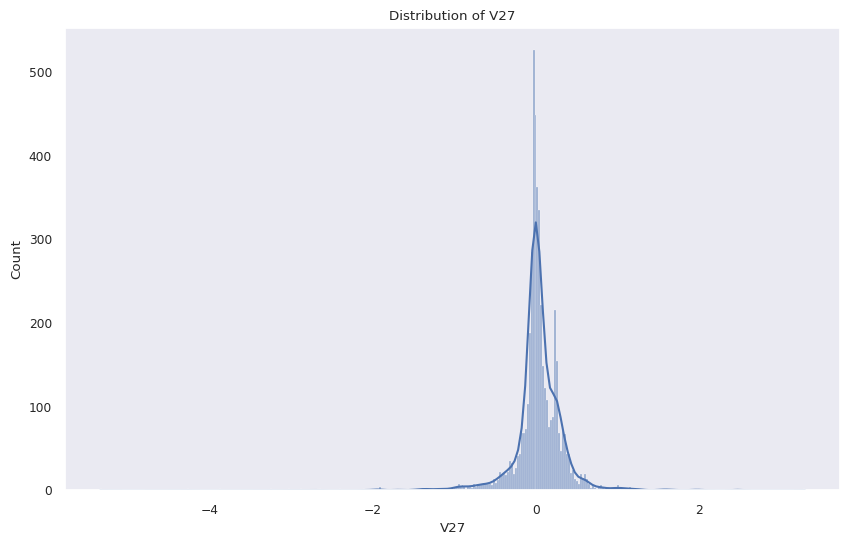

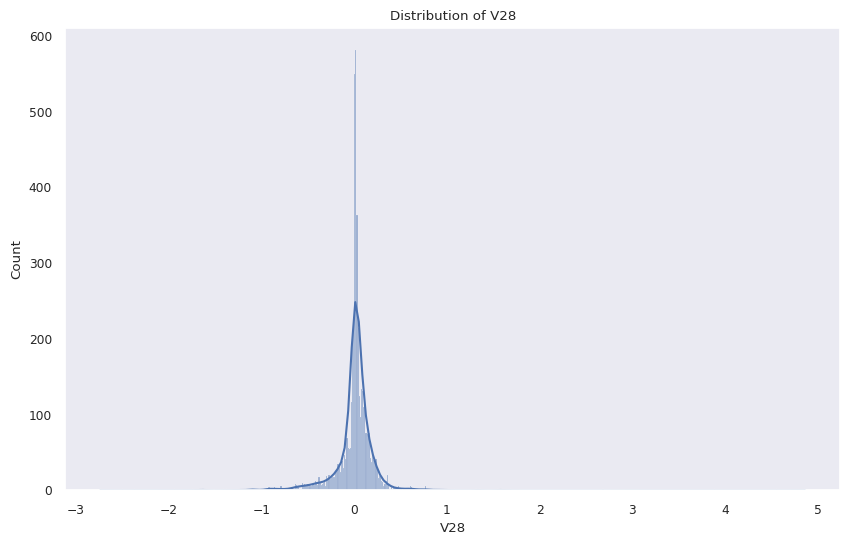

In [30]:
for col in X_train_normal.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=X_train_normal[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [31]:
scaler = StandardScaler()
X_train_normal_scaled = scaler.fit_transform(X_train_normal)
X_train_normal_scaled = pd.DataFrame(X_train_normal_scaled, columns=X_train_normal.columns)

In [32]:
input_dim = X_train_normal_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
autoencoder.fit(X_train_normal_scaled, X_train_normal_scaled,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_split=0.2)

Epoch 1/100
15/15 [==============================] - 2s 27ms/step - loss: 1.1836 - val_loss: 1.3280
Epoch 2/100
15/15 [==============================] - 0s 8ms/step - loss: 1.0911 - val_loss: 1.2165
Epoch 3/100
15/15 [==============================] - 0s 8ms/step - loss: 0.9929 - val_loss: 1.1424
Epoch 4/100
15/15 [==============================] - 0s 8ms/step - loss: 0.9456 - val_loss: 1.1182
Epoch 5/100
15/15 [==============================] - 0s 8ms/step - loss: 0.9214 - val_loss: 1.0927
Epoch 6/100
15/15 [==============================] - 0s 8ms/step - loss: 0.8917 - val_loss: 1.0628
Epoch 7/100
15/15 [==============================] - 0s 8ms/step - loss: 0.8572 - val_loss: 1.0288
Epoch 8/100
15/15 [==============================] - 0s 8ms/step - loss: 0.8217 - val_loss: 0.9979
Epoch 9/100
15/15 [==============================] - 0s 8ms/step - loss: 0.7943 - val_loss: 0.9728
Epoch 10/100
15/15 [==============================] - 0s 5ms/step - loss: 0.7738 - val_loss: 0.9537
Epoch 11

In [33]:
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [34]:
reconstructed = autoencoder.predict(X_test_scaled)
mse = np.mean(np.square(X_test_scaled - reconstructed), axis=1)
threshold = np.percentile(mse, 95)
anomalies = mse > threshold

38/38 [==============================] - 0s 6ms/step


In [35]:
print(confusion_matrix(y_test, anomalies),classification_report(y_test, anomalies))

[[1128   59]
 [   0    1]]               precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      1187
         1.0       0.02      1.00      0.03         1

    accuracy                           0.95      1188
   macro avg       0.51      0.98      0.50      1188
weighted avg       1.00      0.95      0.97      1188

